# LAB 3 (Foundation Of Machine Learning)
###### student name: Simardeep Singh
###### student id: 8976948

# 1) Framing the problem - Describe the goal of this report 

#### **Ans1:** The report's goal on the California Housing Prices dataset is to study the relationship between the median house value and three independent variables: median income, population, and number of households. By running three separate linear regression models, it aims to determine how each of these variables affects the median house value. 

# 2) Getting the Data - hyperlinking to the source and loading into Pandas

#### Ans2: The link to the source is [California Housing Data](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

In [1]:
import pandas as pd

df = pd.read_csv("C:\Foundations_of_Machine_Learning_Frameworks_lab\Labs\lab1\CSCN8010-labs-simardeep-singh\data\housing.csv")


# 3)Exploratory Data Analysis (EDA):

#### 3.1) Explore statistics (e.g. using Pandas `describe` function)

In [2]:
statistics = df.describe()
print(statistics)

          longitude      latitude  housing_median_age   total_rooms   
count  20640.000000  20640.000000        20640.000000  20640.000000  \
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income   
count    20433.000000  20640.000000  20640.000000   20640.000000  \
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

#### 3.2) Describe the 4 variables used in this lab. Review the range of the data for each variable, and other issues you notice


In [3]:
fourVaribales = ['median_income', 'median_house_value', 'population', 'households']
desVar = df[fourVaribales].describe
print(desVar,'\n')


rangeOfData = df[fourVaribales].agg(['min', 'max'])
print("The Minimum and maximum of four variables is:\n",rangeOfData,'\n\n')

#checking issues (missing values and negative values)
print('checking missing values in data of above four variables: \n',df[fourVaribales].isnull().sum(),'\n\n')
print('checking negative values in above four variables: \n',df[fourVaribales][df[fourVaribales] < 0],'\n\n')

# From results it can be seen that the data do not contain any missing or negative value 


<bound method NDFrame.describe of        median_income  median_house_value  population  households
0             8.3252            452600.0       322.0       126.0
1             8.3014            358500.0      2401.0      1138.0
2             7.2574            352100.0       496.0       177.0
3             5.6431            341300.0       558.0       219.0
4             3.8462            342200.0       565.0       259.0
...              ...                 ...         ...         ...
20635         1.5603             78100.0       845.0       330.0
20636         2.5568             77100.0       356.0       114.0
20637         1.7000             92300.0      1007.0       433.0
20638         1.8672             84700.0       741.0       349.0
20639         2.3886             89400.0      1387.0       530.0

[20640 rows x 4 columns]> 

The Minimum and maximum of four variables is:
      median_income  median_house_value  population  households
min         0.4999             14999.0         

#### 3.3) create three Seaborn scatter plots of median house value vs. median income, population and number of households. There should be one scatter plot per each independent variable. Add a title to each graph (using Seaborn). Provide textual review of what you see in these graphs (relevant insights)

#### Ans: 
*Median House Value vs. Median Income shows Positive Correlation:*
 When people in an area earn more money (higher median income), the prices of houses tend to be higher as well. This makes sense because people with higher incomes can afford more expensive homes. So, when incomes go up, house values usually go up too.

*Median House Value vs. Population shows No Clear Linear Relationship:* 
 Just looking at the number of people living in an area (population) doesn't tell us much about how expensive the houses are. There isn't a straightforward pattern where more people always mean more expensive houses. Other things, like local economic conditions or specific types of homes, also play a role.

*Median House Value vs. Number of Households shows No Distinct Linear Pattern:* 
 Similarly, just knowing how many households are there in an area doesn't give a clear idea about house prices. It seems that the number of households alone doesn't predict how much homes cost. Other factors, like how close together houses are or the type of community, might be important too.

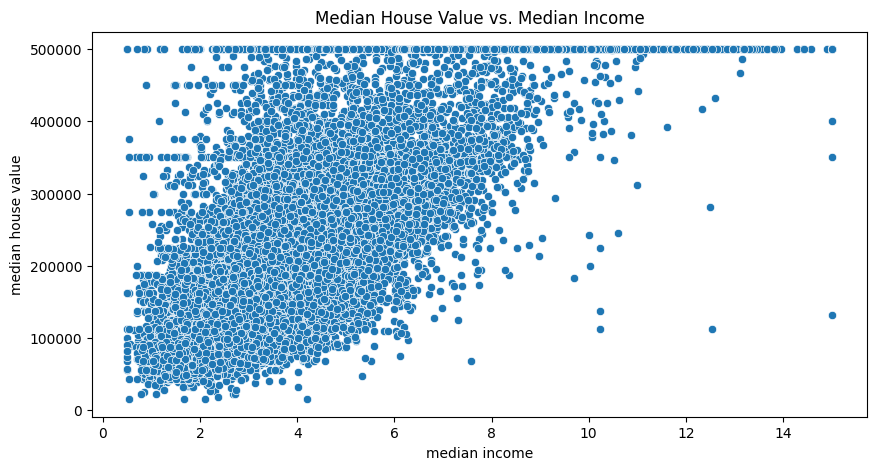

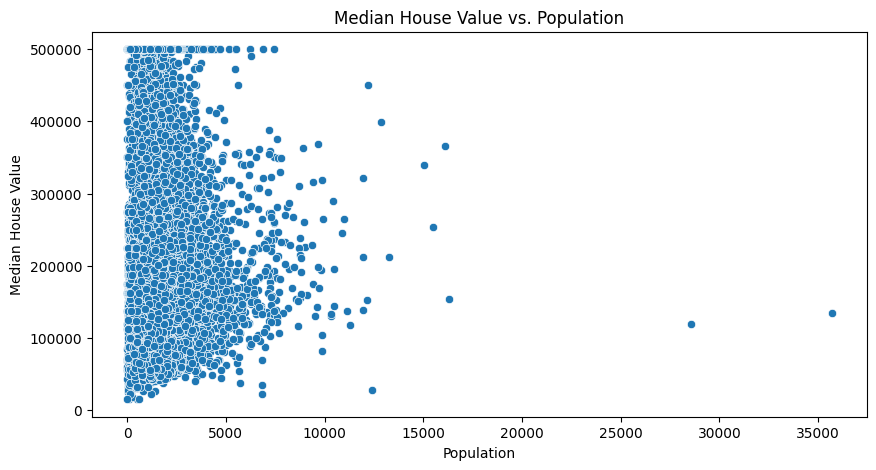

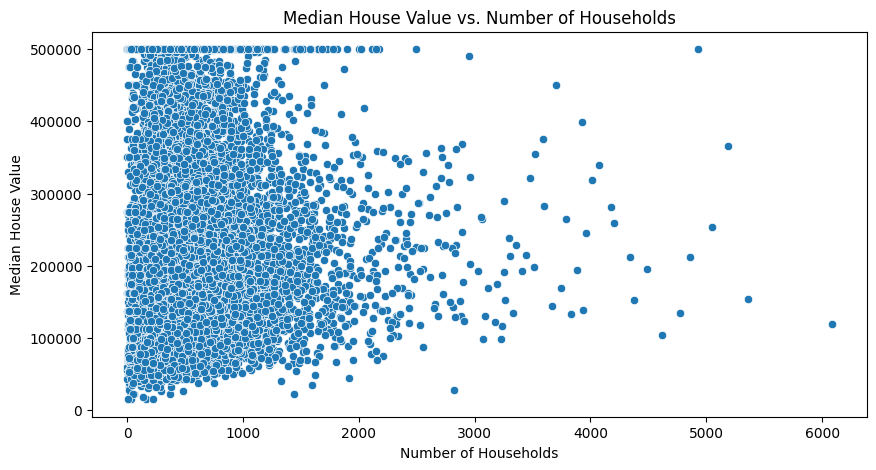

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sb 
# for median house value vs. median income
plt.figure(figsize=(10, 5))
sb.scatterplot(x=df['median_income'], y=df['median_house_value'])
plt.title('Median House Value vs. Median Income'),plt.xlabel('median income'),plt.ylabel('median house value')
plt.show()

# for Median House Value vs. Population
plt.figure(figsize=(10, 5))
sb.scatterplot(x=df['population'], y=df['median_house_value'])
plt.title('Median House Value vs. Population'),plt.xlabel('Population'),plt.ylabel('Median House Value')
plt.show()

# for Median House Value vs. Number of Households
plt.figure(figsize=(10, 5))
sb.scatterplot(x=df['households'], y=df['median_house_value'])
plt.title('Median House Value vs. Number of Households'),plt.xlabel('Number of Households'),plt.ylabel('Median House Value')
plt.show()

## 4) Run three linear regressions (fitting) 
#### and
## 6)Plot the resulting line on top of the scatter data for each of the three models

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

medianHouseValue = df['median_house_value'];medianIncome = df[['median_income']];household = df[['households']];population = df[['population']]

#### 1) median house value vs. median income

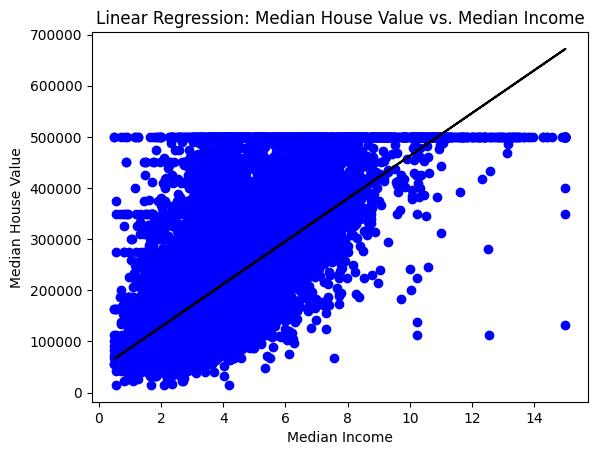

intercept:  45085.5767032679
slope:  41793.849201896286
mean squared error:  7011311502.929527
mean absolute error:  62625.9337911434


In [6]:
model1 = LinearRegression().fit(medianIncome,medianHouseValue)
plt.scatter(medianIncome, medianHouseValue, color='blue')
plt.plot(medianIncome, model1.predict(medianIncome), color='black')
plt.title('Linear Regression: Median House Value vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

intercept_model1 = model1.intercept_
print('intercept: ',intercept_model1)
slope_model1 = model1.coef_[0]
print('slope: ',slope_model1)

pred_model1 = model1.predict(medianIncome)
mse_model1 = mean_squared_error(medianHouseValue, pred_model1)
print('mean squared error: ',mse_model1)
mae_model1 = mean_absolute_error(medianHouseValue, pred_model1)
print('mean absolute error: ',mae_model1)



#### 2) median house value vs. population

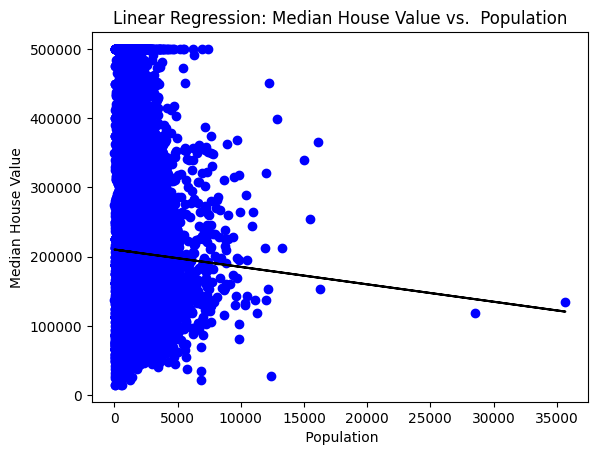

intercept:  210436.26207627333
slope:  -2.511752774615085
mean squared error:  13307412412.389355
mean absolute error:  91153.82009473183


In [7]:
model2 = LinearRegression().fit(population,medianHouseValue)
plt.scatter(population, medianHouseValue, color='blue')
plt.plot(population, model2.predict(population), color='black')
plt.title('Linear Regression: Median House Value vs.  Population')
plt.xlabel(' Population')
plt.ylabel('Median House Value')
plt.show()

intercept_model2 = model2.intercept_
print('intercept: ',intercept_model2)
slope_model2 = model2.coef_[0]
print('slope: ',slope_model2)



pred_model2 = model2.predict(population)
mse_model2 = mean_squared_error(medianHouseValue, pred_model2)
print('mean squared error: ',mse_model2)
mae_model2 = mean_absolute_error(medianHouseValue, pred_model2)
print('mean absolute error: ',mae_model2)

#### 3) median house value vs. number of households.

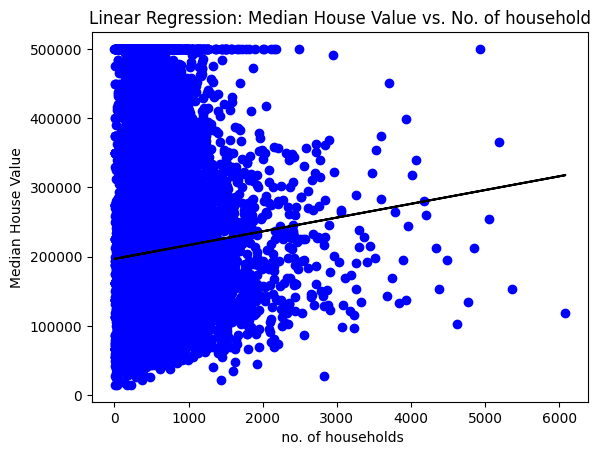

intercept:  196928.57716233088
slope:  19.872775155643875
mean squared error:  13257776904.728533
mean absolute error:  90802.74324318448


In [8]:
model3 = LinearRegression().fit(household,medianHouseValue)
plt.scatter(household, medianHouseValue, color='blue')
plt.plot(household, model3.predict(household), color='black')
plt.title('Linear Regression: Median House Value vs. No. of household')
plt.xlabel(' no. of households')
plt.ylabel('Median House Value')
plt.show()

intercept_model3 = model3.intercept_
print('intercept: ',intercept_model3)
slope_model3 = model3.coef_[0]
print('slope: ',slope_model3)

pred_model3 = model3.predict(household)
mse_model3 = mean_squared_error(medianHouseValue, pred_model3)
print('mean squared error: ',mse_model3)
mae_model3 = mean_absolute_error(medianHouseValue, pred_model3)
print('mean absolute error: ',mae_model3)

# 5)Summarize in a table, for each of the three models


| Feature               | Intercept | Slope  | Mean Squared Error | Mean Absolute Error |
|-----------------------|-----------|--------|--------------------|----------------------|
| Median Income         | 45085.5767032679 | 41793.849201896286 | 7011311502.929527         |  62625.9337911434 |
| Population            | 210436.26207627333 | -2.511752774615085 | 13307412412.389355           | 91153.82009473183 |
| Number of Households  | 196928.57716233088 |19.872775155643875 | 13257776904.728533   |  90802.74324318448       |



# Conclusion

#### Median Income Model: Shows a moderate relationship with some prediction errors. Opportunities to improve and make predictions more consistent.

#### Population Model: Limited ability to predict house values using just population. Predictions have quite a bit of variability, need improvement.

#### Number of Households Model: Indicates a connection, but predictions are not very consistent. Can be improved for more accurate results.

#### Overall the large errors (MSE and MAE) in all models suggest that we need to consider more factors or use a more advanced method to make better predictions.